#        ***CHURN PREDICTION***


---




# **LOADING DATASET**

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/codesoft/churn/Churn_Modelling.csv')

df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
594,595,15603925,Greco,779,Spain,Female,26,4,174318.13,2,0,1,38296.21,0
8342,8343,15773876,Tung,655,France,Female,34,3,0.00,2,1,0,159638.77,0
2933,2934,15713144,Ingrassia,588,Spain,Male,46,8,0.00,1,1,0,61931.21,0
3905,3906,15680436,Hsing,496,France,Female,29,4,0.00,2,1,0,164806.89,0
7629,7630,15591107,Flemming,723,Germany,Female,68,3,110357.00,1,0,0,141977.54,1


**Viewing Distribution of Customers by Geography and churn**

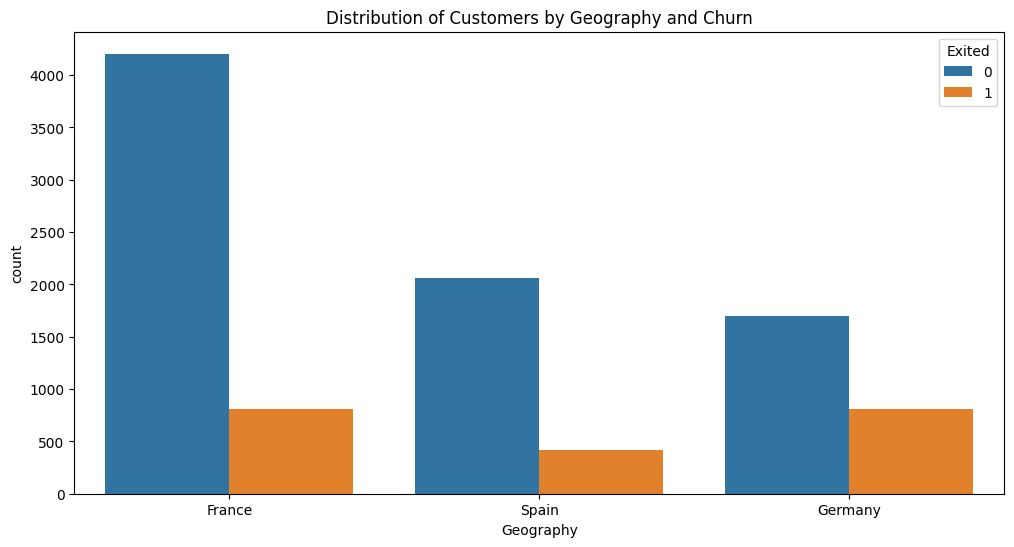

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(x='Geography', data=df, hue='Exited')
plt.title('Distribution of Customers by Geography and Churn')
plt.show()

# **DATA PREPROCESSING**

Creating dummy values for the categorical variable [ Geography ]



In [3]:
# Create dummy variables for 'Geography'
df_geography_dummies = pd.get_dummies(df['Geography'], prefix='Geography')

# Concatenate the original DataFrame and the dummy variables
df = pd.concat([df, df_geography_dummies], axis=1)

# Drop the original 'Geography' column as it's no longer needed
df.drop('Geography', axis=1, inplace=True)

**Viewing Distribution of Customers by Gender and churn**

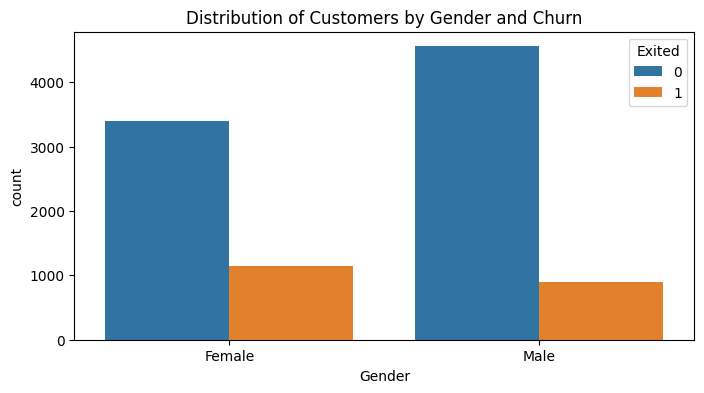

In [4]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Gender', data=df, hue='Exited')
plt.title('Distribution of Customers by Gender and Churn')
plt.show()

Label Encoding for Gender


In [5]:
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})

**Dropping unwanted columns**

In [6]:
df = df.drop('RowNumber', axis='columns')
df = df.drop('Surname', axis='columns')
df = df.drop('CustomerId', axis='columns')

**Visualization of Numerical Variables**



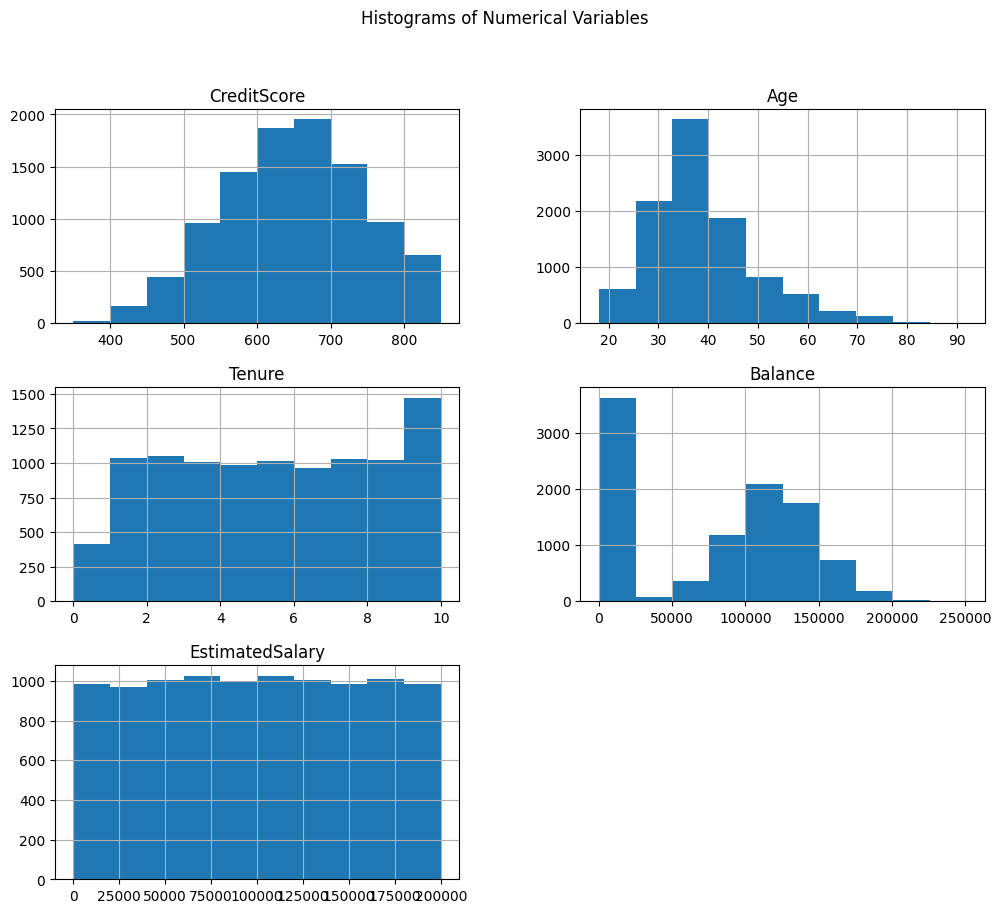

In [7]:
df[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']].hist(figsize=(12, 10))
plt.suptitle('Histograms of Numerical Variables')
plt.show()

****Data normalization by feature scaling**

In [8]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Select the columns to be scaled
columns_to_scale = ['Balance', 'CreditScore', 'EstimatedSalary','Age','Tenure']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [9]:
df.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
613,0.634,1,0.270270,0.1,0.347561,1,1,1,0.389314,0,0,0,1
7617,0.304,1,0.202703,0.7,0.000000,2,0,1,0.020357,0,1,0,0
2369,0.596,0,0.486486,0.7,0.471271,1,1,0,0.862959,1,0,0,1
6358,0.604,0,0.189189,0.2,0.000000,2,1,0,0.273109,0,1,0,0
1852,0.696,1,0.270270,1.0,0.378683,1,1,1,0.526132,0,0,0,1


In [10]:
# prompt:

df.head()


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,0,0.324324,0.2,0.000000,1,1,1,0.506735,1,1,0,0
1,0.516,0,0.310811,0.1,0.334031,1,0,1,0.562709,0,0,0,1
2,0.304,0,0.324324,0.8,0.636357,3,1,0,0.569654,1,1,0,0
3,0.698,0,0.283784,0.1,0.000000,2,0,0,0.469120,0,1,0,0
4,1.000,0,0.337838,0.2,0.500246,1,1,1,0.395400,0,0,0,1


# **MODEL EVALUATION**

**Implementing RandomForest classifier**

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming your target variable is 'Exited'
X = df.drop('Exited', axis=1)
y = df['Exited']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Accuracy: 0.8670

Confusion Matrix:
[[1548   59]
 [ 207  186]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



Here the data is immbalanced , so analaysing the **Distribution of churn class [Excited]**

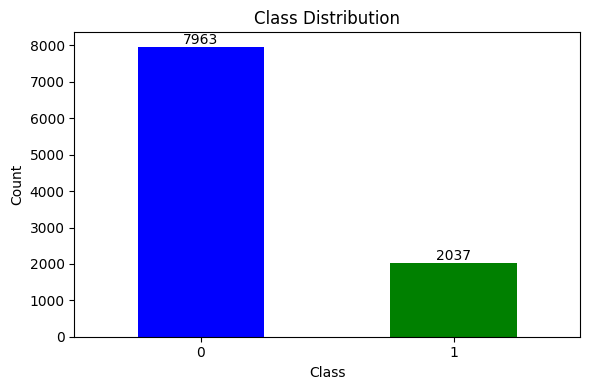

In [12]:
import matplotlib.pyplot as plt

# Count the number of occurrences of each class
class_counts = df['Exited'].value_counts()

# Plot the class distribution
plt.figure(figsize=(6, 4))
bars = class_counts.plot(kind='bar', color=['blue', 'green'])

# Annotate each bar with its count value
for i, count in enumerate(class_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


**OverSampling**

In [13]:
from imblearn.over_sampling import SMOTE

X = df.drop('Exited', axis=1)
y = df['Exited']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Exited')], axis=1)

print(df_resampled.head())

   CreditScore  Gender       Age  Tenure   Balance  NumOfProducts  HasCrCard  \
0        0.538       0  0.324324     0.2  0.000000              1          1   
1        0.516       0  0.310811     0.1  0.334031              1          0   
2        0.304       0  0.324324     0.8  0.636357              3          1   
3        0.698       0  0.283784     0.1  0.000000              2          0   
4        1.000       0  0.337838     0.2  0.500246              1          1   

   IsActiveMember  EstimatedSalary  Geography_France  Geography_Germany  \
0               1         0.506735                 1                  0   
1               1         0.562709                 0                  0   
2               0         0.569654                 1                  0   
3               0         0.469120                 1                  0   
4               1         0.395400                 0                  0   

   Geography_Spain  Exited  
0                0       1  
1         

In [14]:
import numpy as np

# Example value counts of y_resampled
unique_elements, counts = np.unique(y_resampled, return_counts=True)

# Print the unique elements and their counts
for elem, count in zip(unique_elements, counts):
    print(f"{elem}: {count}")

0: 7963
1: 7963


**Viewing the Balnced Data**

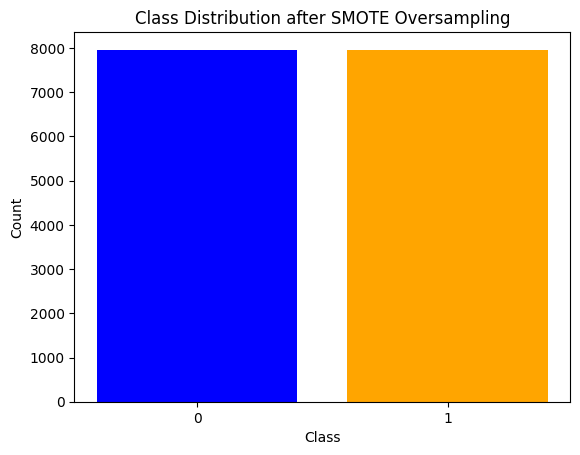

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Example value counts of y_resampled
unique_elements, counts = np.unique(y_resampled, return_counts=True)

# Create a bar graph
plt.bar(unique_elements, counts, color=['blue', 'orange'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution after SMOTE Oversampling')
plt.xticks(unique_elements)  # Ensure all classes are labeled on the x-axis
plt.show()


**Training the model with the balanced data**

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming you have X_resampled and y_resampled from SMOTE
# If you used a different oversampling technique, adjust accordingly

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Accuracy: 0.8845

Confusion Matrix:
[[1441  192]
 [ 176 1377]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      1633
           1       0.88      0.89      0.88      1553

    accuracy                           0.88      3186
   macro avg       0.88      0.88      0.88      3186
weighted avg       0.88      0.88      0.88      3186



**Gradient Boosting**

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming you have X_resampled and y_resampled from SMOTE
# If you used a different oversampling technique, adjust accordingly

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Accuracy: 0.8719

Confusion Matrix:
[[1427  206]
 [ 202 1351]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      1633
           1       0.87      0.87      0.87      1553

    accuracy                           0.87      3186
   macro avg       0.87      0.87      0.87      3186
weighted avg       0.87      0.87      0.87      3186



In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Assuming you have X_resampled and y_resampled from SMOTE
# If you used a different oversampling technique, adjust accordingly

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the model with different hyperparameter combinations
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Use the best model to make predictions on the test set
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate the model
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1633
           1       0.93      0.88      0.90      1553

    accuracy                           0.91      3186
   macro avg       0.91      0.91      0.91      3186
weighted avg       0.91      0.91      0.91      3186



In [21]:
from sklearn.metrics import classification_report

# Assuming 'y_test' contains the true labels and 'y_pred' contains the predicted labels
# Adjust these variables based on your specific code

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1633
           1       0.93      0.88      0.90      1553

    accuracy                           0.91      3186
   macro avg       0.91      0.91      0.91      3186
weighted avg       0.91      0.91      0.91      3186



**Feature Importance Plot**

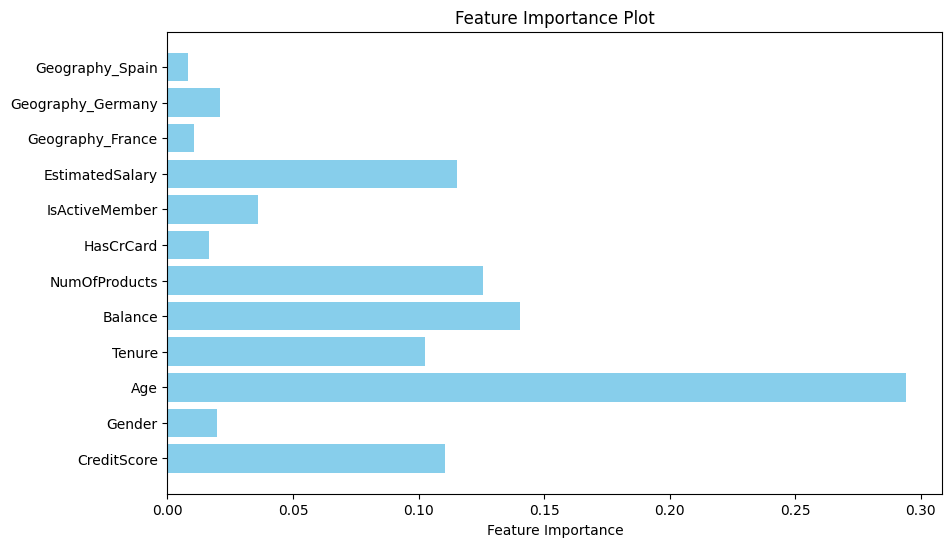

In [22]:
import matplotlib.pyplot as plt

# Assuming 'rf_model' is your trained RandomForestClassifier
feature_importances = rf_model.feature_importances_
feature_names = X.columns

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance Plot')
plt.show()


# **DATA VISUALIZATION**


> Indented block



**ROC Curve**




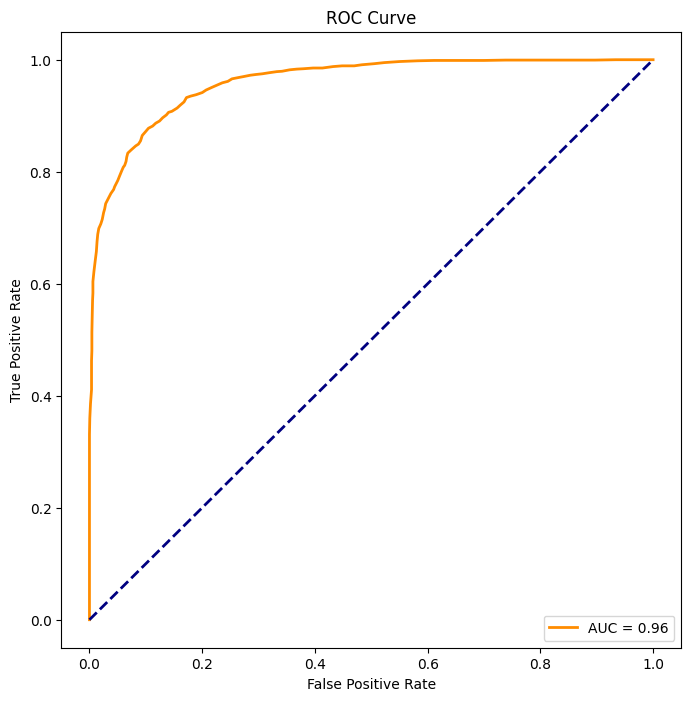

In [30]:
# Assuming 'rf_model' is your trained RandomForestClassifier
# Assuming 'X_test' is your test set

# Get predicted probabilities for class 1
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Now you can use the roc_curve and auc functions as before
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Create ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


**Confusion Matrix Heatmap:**

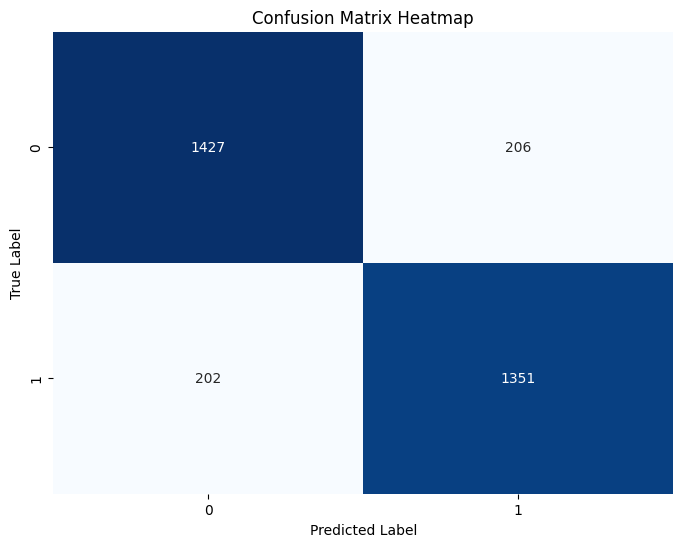

In [25]:
import seaborn as sns

# Assuming 'conf_matrix' is the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()


**Precision-Recall Curve:**

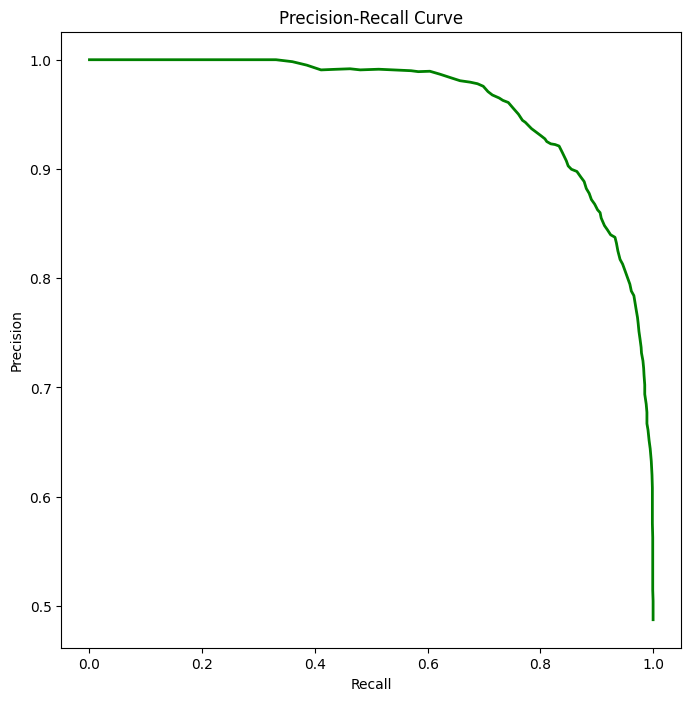

In [31]:
from sklearn.metrics import precision_recall_curve

# Assuming 'y_prob' is the predicted probabilities for class 1
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 8))
plt.plot(recall, precision, color='green', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


**Distribution of Predicted Probabilities:**

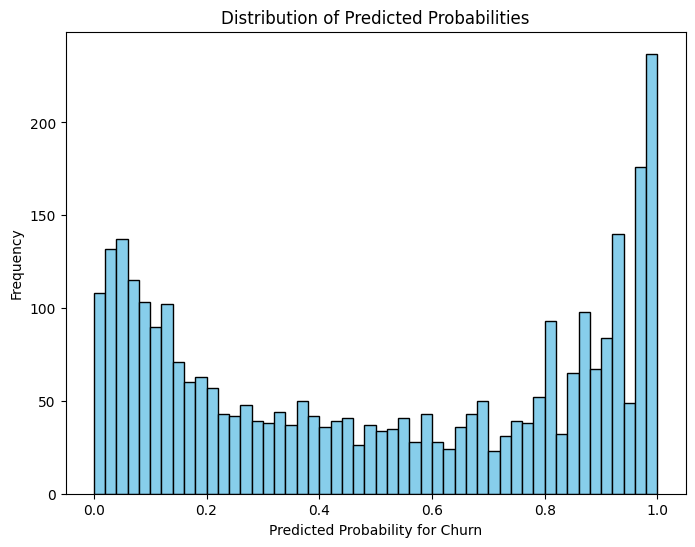

In [32]:
# Assuming 'rf_model' is your trained RandomForestClassifier
# Assuming 'X_test' is your test set

# Get predicted probabilities for class 1
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Plot the distribution of predicted probabilities
plt.figure(figsize=(8, 6))
plt.hist(y_prob, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Predicted Probability for Churn')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities')
plt.show()


**Customer Churn Rate Over Time:**

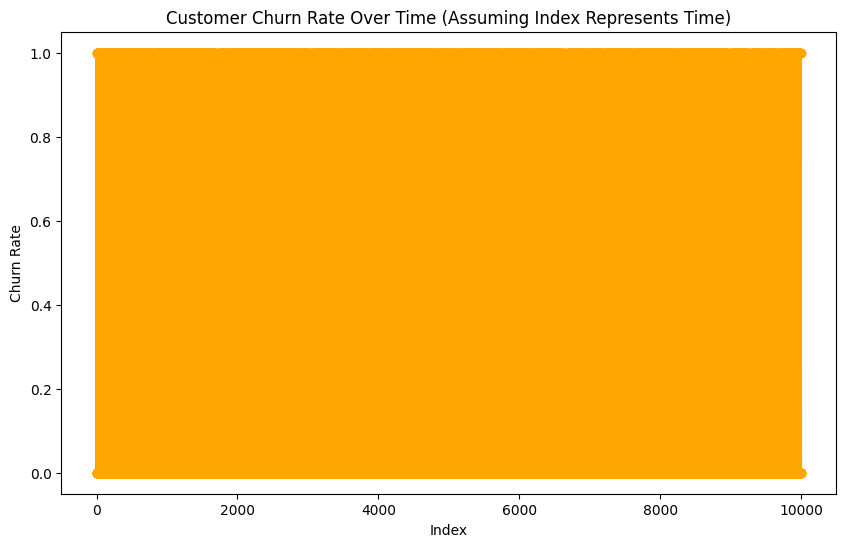

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Exited'], marker='o', linestyle='-', color='orange')
plt.xlabel('Index')
plt.ylabel('Churn Rate')
plt.title('Customer Churn Rate Over Time (Assuming Index Represents Time)')
plt.show()


**Customer Segmentation using KMeans clustering algorithm**



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


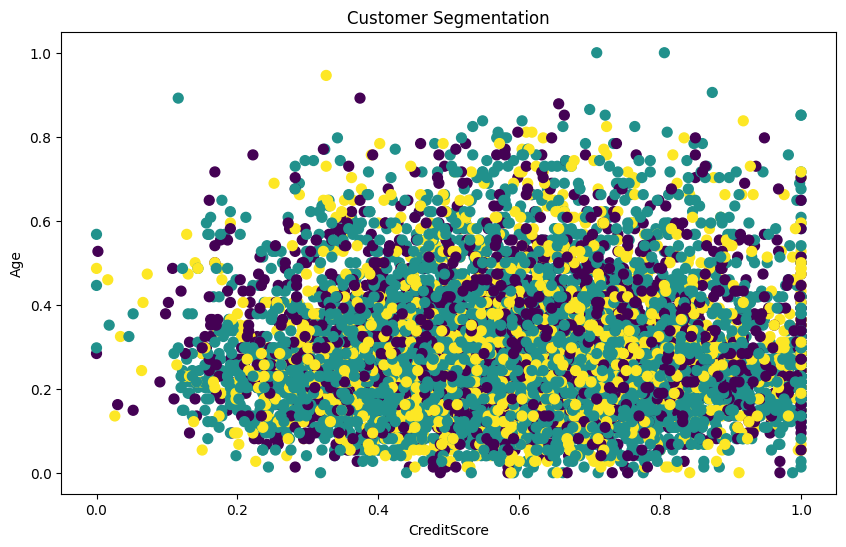

In [40]:
from sklearn.cluster import KMeans

# Assuming 'X' is your feature matrix
# Assuming 'n_clusters' is the number of clusters you want to create
kmeans = KMeans(n_clusters=3)  # You can adjust the number of clusters as needed
kmeans_labels = kmeans.fit_predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(X['CreditScore'], X['Age'], c=kmeans_labels, cmap='viridis', s=50)
plt.xlabel('CreditScore')
plt.ylabel('Age')
plt.title('Customer Segmentation')
plt.show()


**Cost-Benefit Analysis:**

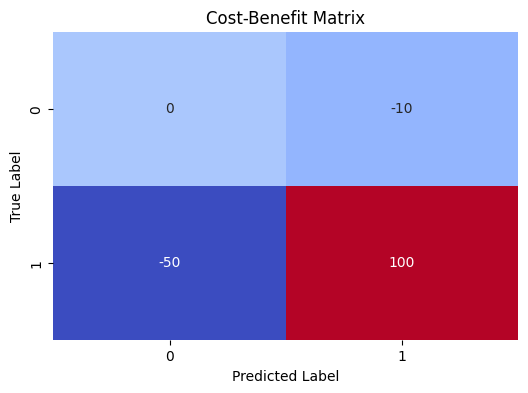

Total Cost: -10230
Total Benefit: 137000


In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'cost_benefit_matrix' is a 2x2 matrix where:
# - cost_benefit_matrix[0, 0] is the True Negative (TN) cost
# - cost_benefit_matrix[0, 1] is the False Positive (FP) cost
# - cost_benefit_matrix[1, 0] is the False Negative (FN) cost
# - cost_benefit_matrix[1, 1] is the True Positive (TP) benefit

# Example cost-benefit matrix (replace this with your actual values)
cost_benefit_matrix = [[0, -10], [-50, 100]]

# Assuming 'y_test' and 'y_pred' are the true labels and predicted labels
# Adjust these variables based on your specific code

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate the total cost and benefit
total_cost = (conf_matrix[0, 1] * cost_benefit_matrix[0][1]) + (conf_matrix[1, 0] * cost_benefit_matrix[1][0])
total_benefit = (conf_matrix[1, 1] * cost_benefit_matrix[1][1])

# Create a heatmap of the cost-benefit matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cost_benefit_matrix, annot=True, fmt='g', cmap='coolwarm', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Cost-Benefit Matrix')
plt.show()

# Display total cost and benefit
print(f'Total Cost: {total_cost}')
print(f'Total Benefit: {total_benefit}')
